# 서울시 업무추진비
* https://opengov.seoul.go.kr/expense
* "업무추진비"는 서울시는 업무추진에 대한 비용집행의 투명성을 제고하고자 공개된, 시장단을 비롯하여 4급 부서장 이상의 간부직 공무원의 업무추진비 집행내역이다.
* 데이터는 미리 크롤링된 데이터를 사용하였다. 데이터 출처 : [jy617lee/popular_restaurants_from_officials: 서울시 공무원의 업무추진비를 분석하여 진짜 맛집 찾기 프로젝트](https://github.com/jy617lee/popular_restaurants_from_officials) 

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

In [2]:
# 크롤링된 데이터를 가져와서 df라는 데이터프레임에 담아준다.
df = pd.read_csv("data/raw.csv", index_col="연번")
df.shape

(51456, 9)

In [3]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [4]:
df.tail()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
42,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)
43,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,40000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:04,스타벅스 (중구 을지로 19)


In [5]:
# 각 컬럼의 요약 정보를 본다.
# 몇 개의 컬럼과 데이터가 있는지 데이터의 사이즈는 얼마나 되는지, 데이터 타입 등의 정보를 볼 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51456 entries, 1 to 43
Data columns (total 9 columns):
1소속부서    51456 non-null object
결제방법     51279 non-null object
구분       1479 non-null object
대상인원     51448 non-null object
부서명      51454 non-null object
집행금액     51455 non-null float64
집행목적     51440 non-null object
집행일시     51455 non-null object
집행장소     51421 non-null object
dtypes: float64(1), object(8)
memory usage: 3.9+ MB


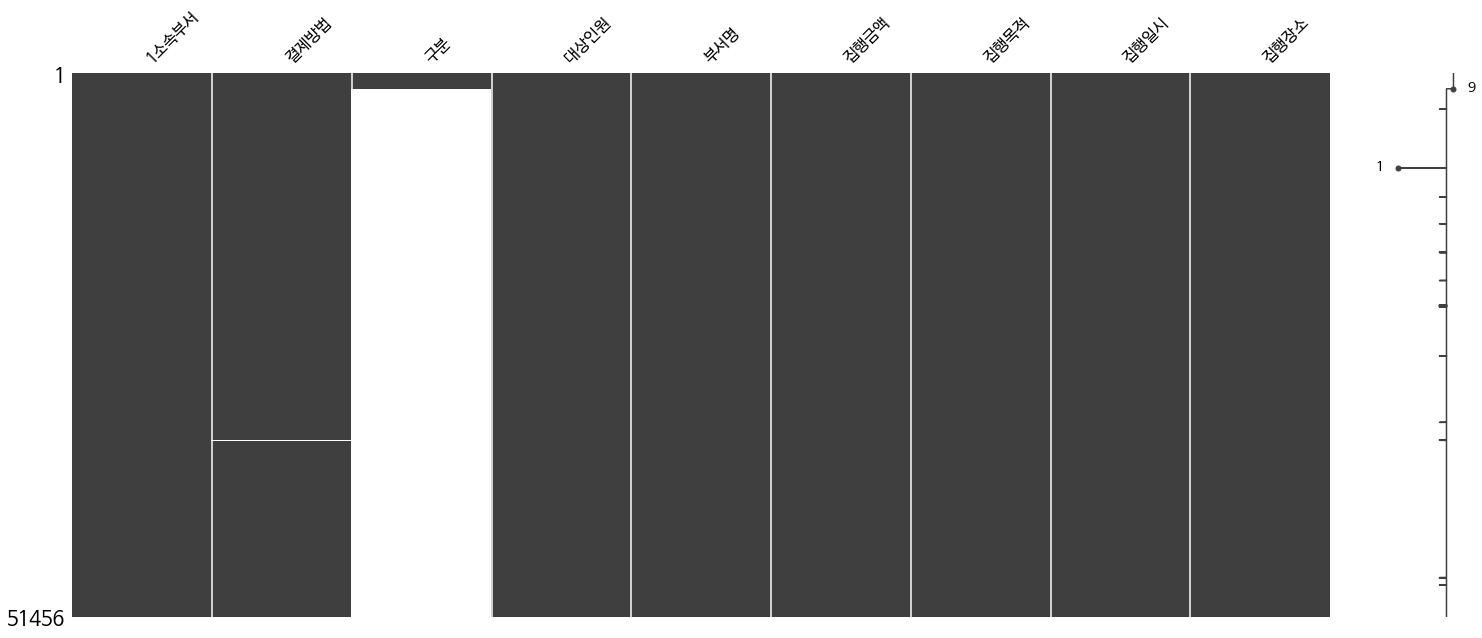

In [6]:
# 결측치를 시각화 해본다.
# !pip install missingno 를 통해 별도의 설치가 필요하다. 
# 아나콘다는 다음의 url을 참고해서 설치한다.
# https://anaconda.org/conda-forge/missingno
# 아마도 해당 라이브러리의 개발자가 포켓몬을 좋아하는 것 같다.
msno.matrix(df)

In [7]:
df.isnull().sum()

1소속부서        0
결제방법       177
구분       49977
대상인원         8
부서명          2
집행금액         1
집행목적        16
집행일시         1
집행장소        35
dtype: int64

In [8]:
# 집행일시에 NaN(결측치) 데이터가 있다.
# 해당 데이터를 확인해 본다.
df[df['집행일시'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.,서울혁신기획관,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 집행일시의 결측치 인덱스를 가져온다.
missing_dt_row = df[df['집행일시'].isnull()].index[0]
missing_dt_row

'해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.'

In [10]:
# 해당 행을 누락시키고 다시 df 변수에 담아준다.
print(df.shape)
df = df.drop([missing_dt_row])
print(df.shape)

(51456, 9)
(51455, 9)


In [11]:
print(df.shape)
df['집행일시'] = pd.to_datetime(df['집행일시'])
df['연'] = df['집행일시'].dt.year.astype(int)
df['월'] = df['집행일시'].dt.month.astype(int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str)
df['일'] = df['집행일시'].dt.day
df['시'] = df['집행일시'].dt.hour
df['요일'] = df['집행일시'].dt.dayofweek.astype(int)
print(df.shape)

(51455, 9)
(51455, 15)


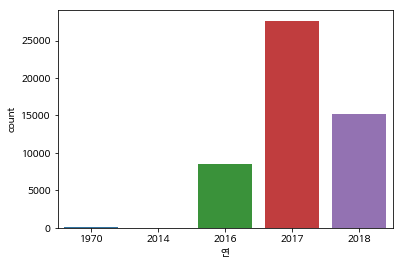

In [12]:
sns.countplot(data=df, x='연')

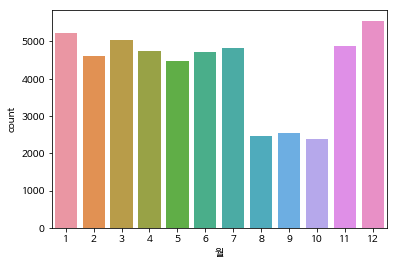

In [13]:
sns.countplot(data=df, x='월')

In [14]:
# 그래프에서 연월 순으로 보기 위해 정렬을 해주었다.
df = df.sort_values(by=['연', '월'], ascending=True)

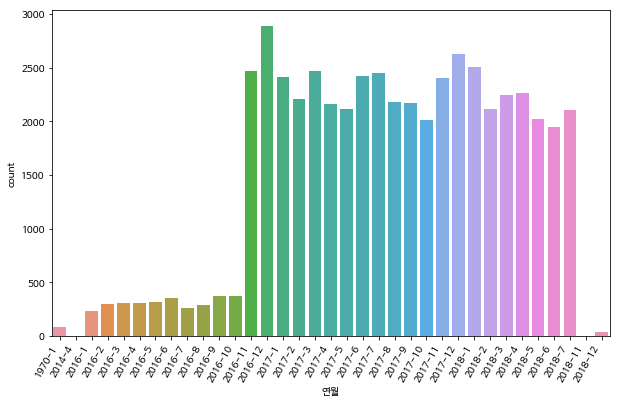

In [15]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=60, ha='right')
sns.countplot(data=df, x='연월')

In [16]:
# 집행일시가 미래의 데이터가 들어간 것이 있다. 확인이 필요하다.
df[(df['연'] == 2018) & (df['월'] == 12)].head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,요일
연번,,,,,,,,,,,,,,,
1,시민건강국,카드,NaN,보건의료정책과장 등 8명,보건의료정책과,137600.0,겨울철 응급의료상황대비 업무추진관련 간담회비 지급,2018-12-01 12:27:00,FC외식(중구 태평로1가),2018,12,2018-12,1,12,5
2,시민건강국,카드,NaN,시민건강국장 등 3명,보건의료정책과,55000.0,시민건강국 현안업무 추진직원 격려 간담회비 지급,2018-12-04 20:23:00,대가일식(중구 서소문로101),2018,12,2018-12,4,20,1
3,시민건강국,카드,NaN,보건의료정책과장 등 6명,보건의료정책과,84000.0,시립병원장 회의추진관련 유관부서 간담회비 지급,2018-12-04 12:45:00,한가람(중구 을지로1가),2018,12,2018-12,4,12,1
4,시민건강국,카드,NaN,보건정책팀장 등 4명,보건의료정책과,40500.0,건강서울종합계획 수립관련 유관부서 간담회비 지급,2018-12-04 12:33:00,무교동낙지(중구 태평로2가),2018,12,2018-12,4,12,1
5,시민건강국,카드,NaN,보건정책팀장 등 3명,보건의료정책과,30000.0,예결위 예산심사관련 유관부서 간담회비 지급,2018-12-05 12:43:00,장호왕곱창(중구 서소문로83),2018,12,2018-12,5,12,2


In [17]:
weekday_map= {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}

In [18]:
df["요일_한글"] = df["요일"].apply(lambda x : weekday_map[x])
df["요일_한글"].head()

연번
31    목
46    목
27    목
37    목
38    목
Name: 요일_한글, dtype: object

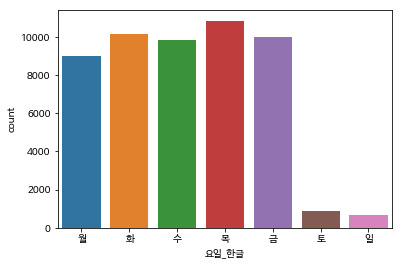

In [19]:
sns.countplot(data=df.sort_values(by="요일"), x='요일_한글')

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [21]:
text = ' '.join(df['집행목적'].fillna(''))

In [22]:
df['집행목적'].value_counts()

현안업무 추진직원 격려 간담회 개최비용 지급                          692
시정 운영 관련 유관부서 업무협의 간담회                            237
시정 홍보 강화를 위한 언론기관 간담회                             158
경조금 지급                                            144
시정 운영 관련 유관기관 의견수렴 간담회                            140
사회혁신 의제 발굴 논의 간담회                                 129
시정현안 관련 국회 등 유관기관 업무협의 간담회                        125
시정 현안관련 유관기관 간담회                                  120
시정 정책 추진 자문 간담회                                   110
시정 현안관련 유관부서 간담회                                  108
소속 상근직원 경조사비 지급                                    99
시정 홍보 강화를 위한 의회 등 유관기관 간담회                         96
시정 현안 관련 유관부서 업무협의 간담회                             88
현안업무 추진 직원 격려 간담회 개최 비용 지급                         86
시정 정책 현안 관련 업무협의                                   85
시정 홍보 강화를 위한 국회 등 유관기관 간담회                         85
내방객 접대용 다과구매(기획관)                                  83
시정 현안 관련 언론기관 의견수렴 간담회                             82
서울혁신파크 활성화 방안 논의 간담회        

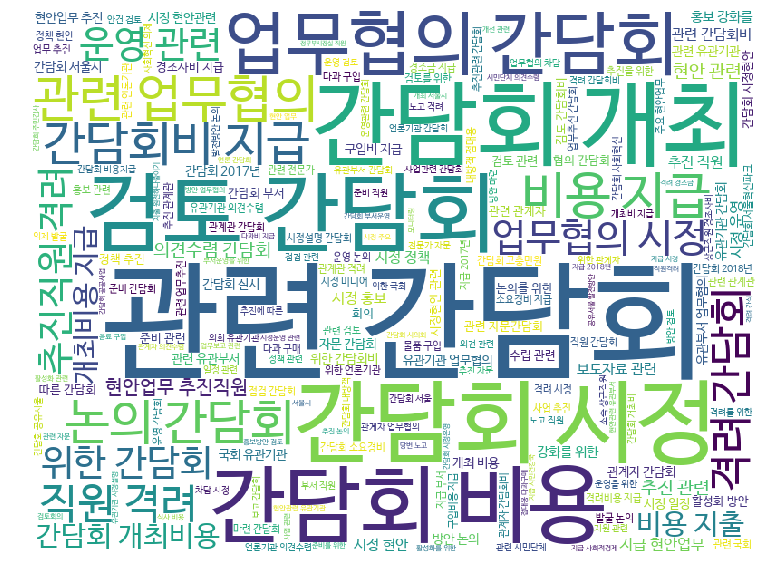

In [23]:
displayWordCloud(text)

In [24]:
def spend_gubun(spend):
    spend = spend.strip()
    if spend == np.nan:
        gubun = spend
    elif '간담회' in spend:
        gubun = '간담회'
    elif '격려' in spend:
        gubun = '격려'
    elif '물품구입' in spend:
        gubun = '물품구입'
    elif bool(re.search(r'경조[사|금|비]', spend)):
        gubun = '경조사'
    elif bool(re.search(r'식사|회식', spend)):
        gubun = '회식'
    else:
        gubun = spend
    return gubun

In [25]:
spend_gubun('격려지급')

'격려'

In [26]:
df['집행목적'] = df['집행목적'].fillna('')

In [27]:
df['집행구분'] = df['집행목적'].apply(spend_gubun)
spend_gubun = ' '.join(df['집행구분'])
spend_gubun[:100]

'시정 현장방문 관련 업무협의 간담회 격려 시정 일정 및 현장방문 관련 업무협의 사망직원 유족 위로금 지급 간담회 결혼축하품 구입비 지출 시정 노고 직원 생일 축하품 구입비 지급 간'

In [28]:
spend_gubun = spend_gubun.replace("  ", " ")

In [29]:
df["집행구분"].value_counts().head(20)

간담회                       38328
격려                         3545
경조사                         676
회식                          293
물품구입                        107
시정 정책 현안 관련 업무협의             85
내방객 접대용 다과구매(기획관)            83
시정 일정 및 의전 관련 업무협의           68
시정 일정 관련 업무협의                59
시정 비서실 현안 관련 업무협의            54
부시장실 운영 다과 및 물품 구입           51
시정 미디어 현안 관련 업무협의            45
부서 직원의 사기앙양을 위한 간식비 지급       44
시정 일정 및 현장방문 관련 업무협의         43
기강감찰 행정소요경비 지급               40
시정현안회의용 다과 구매                39
내방객 응대를 위한 다과구매              36
축.부의금 지급                     31
시정 일정 관련 업무협의 차담             31
시정 일정 및 비서 관련 업무협의           31
Name: 집행구분, dtype: int64

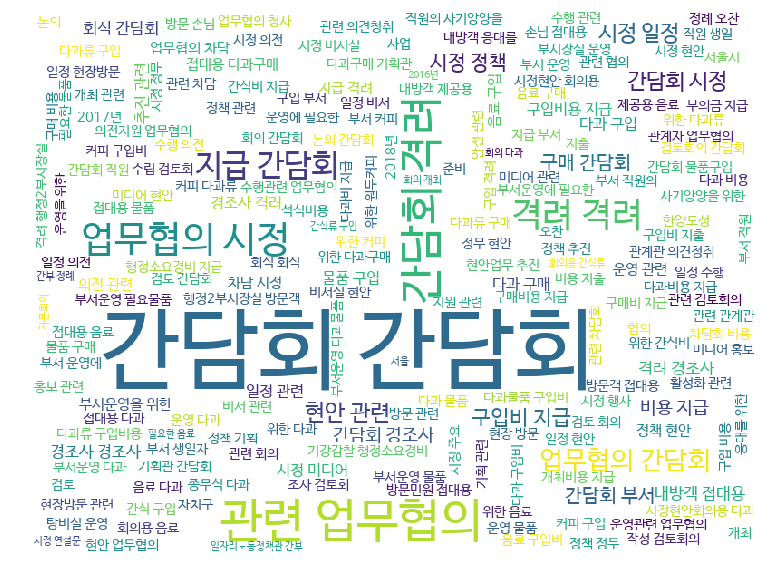

In [30]:
displayWordCloud(spend_gubun)

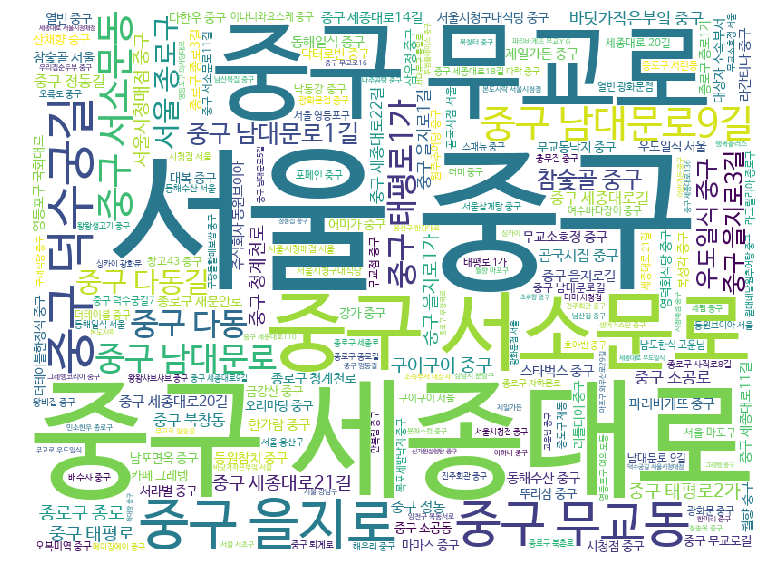

In [31]:
# 워드클라우드로 전처리할 텍스트를 살펴본다.
displayWordCloud(" ".join(df["집행장소"].fillna('')))

* 집행장소로 주소가 많이 보인다. 주소는 전처리를 통해 제거한다.
* 또, 상호명이라는 컬럼을 만들어 집행장소에서 상호명을 가져오도록 한다.

In [32]:
# 상호명이 여는 괄호 앞쪽에 있는 것들이 있다.
# 여는 괄호 앞에 있는 곳을 상호명으로 하자.
df['집행장소'] = df['집행장소'].fillna('')
df['상호명'] = df['집행장소'].apply(lambda x : x.split('(')[0].strip())
# 서울|중구|종로구 뒤에 공백이 있으면 주소라고 가정한다.
df['상호명'] = df['상호명'].apply(lambda x : x.split('서울 ')[0].strip())
df['상호명'] = df['상호명'].apply(lambda x : x.split('중구 ')[0].strip())
df['상호명'] = df['상호명'].apply(lambda x : x.split('종로구 ')[0].strip())

In [33]:
df.loc[df['상호명'] == '', '집행목적'].value_counts().head()

현안업무 추진직원 격려 간담회 개최비용 지급    8
상수도사업본부직원경조사비 지급            4
부서운영을 위한 원두커피 구입비 지급        3
도시기반시설본부직원 경조사비 지급          3
물순환안전국직원경조사비 지급             2
Name: 집행목적, dtype: int64

In [34]:
df_shop = df.loc[ (df['상호명'] != '-') & (df['상호명'] != '')  & (df['상호명'] != '대상자 소속부서') ]

print(df.shape)
print(df_shop.shape)

(51455, 18)
(50428, 18)


In [35]:
df_shop['상호명'].value_counts().head(30)

참숯골           806
우도일식          759
서울시청매점        718
구이구이          658
곰국시집          518
서울시청구내식당      429
동해일식          405
무교소호정         393
동해수산          359
스타벅스          322
바닷가작은부엌       320
라칸티나          318
한가람           317
동원참치          308
더테이블한정식       306
제일가든          288
어미가           281
삼우정           280
오리마당          266
파리바게뜨         261
월향            257
복성각           257
남포면옥          235
열빈            233
무교동낙지         230
포메인           226
（주）바닷가작은부엌    223
마마스           219
서라벌           207
오복미역          206
Name: 상호명, dtype: int64

In [36]:
df_shop.loc[df_shop['상호명'] == '（주）바닷가작은부엌', "상호명"] = "바닷가작은부엌"

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
top_50 = df_shop['상호명'].value_counts().head(50)
top_50 = pd.DataFrame(top_50).reset_index()
top_50.columns = ['상호명', '횟수']
top_50

,상호명,횟수
0,참숯골,806
1,우도일식,759
2,서울시청매점,718
3,구이구이,658
4,바닷가작은부엌,543
5,곰국시집,518
6,서울시청구내식당,429
7,동해일식,405
8,무교소호정,393
9,동해수산,359


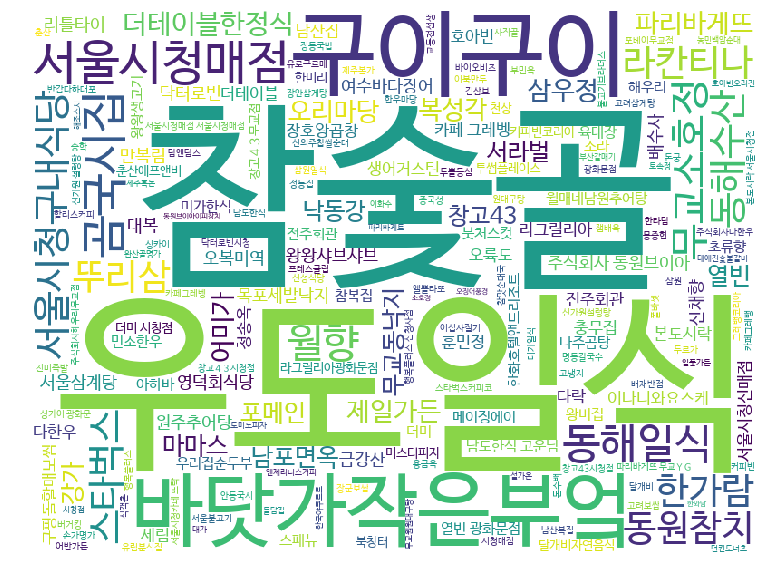

In [38]:
displayWordCloud(' '.join(df_shop['상호명']))